In [1]:
import numpy as np
import pandas as pd

In [4]:
column_names=['user_id','item_id','rating','timestamp']
df= pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df=pd.merge(df,movie_titles,on='item_id')

In [11]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [23]:
rating=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))

In [24]:
rating.head()

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


In [25]:
rating['no_of_rating']=pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False))

In [26]:
rating.head()

,rating,no_of_rating
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

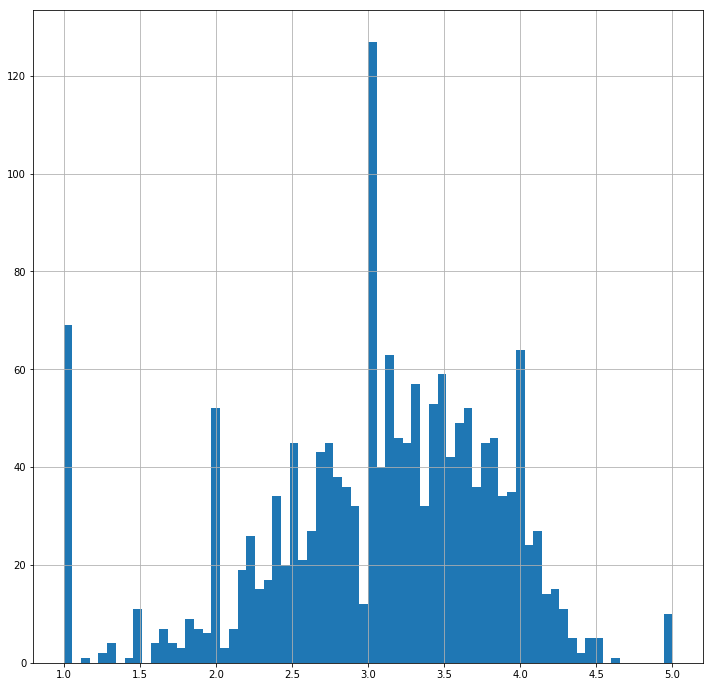

In [43]:
plt.figure(figsize=(12,12))
#plt.scatter(rating['no_of_rating'],rating['rating'])
rating['rating'].hist(bins=70)

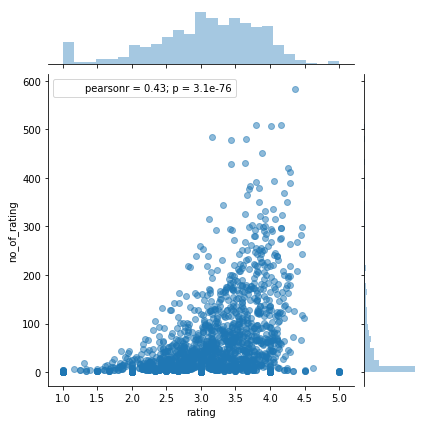

In [47]:
sns.jointplot(x='rating',y='no_of_rating',data=rating,alpha=0.5)

In [50]:
moviemat=df.pivot_table(columns='title',index='user_id',values='rating')

In [51]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
rating.sort_values('no_of_rating',ascending=False)

,rating,no_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [54]:
star_war_ratings=moviemat['Star Wars (1977)']
Liar_Liar_ratings=moviemat['Liar Liar (1997)']

In [55]:
star_war_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [56]:
similar_to_star_wars=moviemat.corrwith(star_war_ratings)

C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [57]:
similar_to_Liar_Liar=moviemat.corrwith(Liar_Liar_ratings)

C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [64]:
corr_star_wars=pd.DataFrame(similar_to_star_wars,columns=['correlation'])

In [65]:
corr_liar_liar=pd.DataFrame(similar_to_Liar_Liar,columns=['correlation'])

In [66]:
corr_star_wars.dropna(inplace=True)

In [68]:
corr_liar_liar.dropna(inplace=True)

In [69]:
corr_star_wars.sort_values('correlation',ascending=False)

,correlation
title,
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Man of the Year (1995),1.000000
Hollow Reed (1996),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Good Man in Africa, A (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


In [70]:
corr_liar_liar.sort_values('correlation',ascending=False)

,correlation
title,
"Bonheur, Le (1965)",1.000000
For Ever Mozart (1996),1.000000
Crossfire (1947),1.000000
Johnny 100 Pesos (1993),1.000000
Moonlight and Valentino (1995),1.000000
Mina Tannenbaum (1994),1.000000
"Stranger, The (1994)",1.000000
"Wooden Man's Bride, The (Wu Kui) (1994)",1.000000
Legal Deceit (1997),1.000000


In [77]:
corr_star_wars=corr_liar_liar.join(rating['no_of_rating'])
corr_liar_liar=corr_liar_liar.join(rating['no_of_rating'])

In [74]:
corr_star_wars[corr_star_wars['no_of_rating']>100].sort_values('correlation',ascending=False)

,correlation,no_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [78]:
corr_liar_liar[corr_liar_liar['no_of_rating']>100].sort_values('correlation',ascending=False)

,correlation,no_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
